<a href="https://colab.research.google.com/github/mbumba1/Data-Science-For-Beginners/blob/main/day2_data_cleaning_student_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is not uncommon for data to be spread across multiple files and need to be combined. For example, you could have an excel file for every experiment you conducted. Or you might have data for a phenomenon that is changing over time and each file includes the observations for each timepoint. Moreover, what if your data is messy with missing data and needs some preprocessing in a systematic, reproducible way before doing anything else with it? Of course you can manually combine them into a single excel file, fill the missing data in excel manually using its functions. But wouldn't it be best if you can automate it and have the code be the record of how you processed everything? In this notebook, we will deal with a relatively large dataset that is divided into multiple parts and is messy. We will process it so that it is ready for applying machine learning models. The dataset has been adapted from Chapter 4 of the book 'Python for Data Science'.

## Parsing through folders and reading files into pandas objects

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

os is a package that lets you interact with your file system. see https://docs.python.org/3/library/os.html for more information. In particular, the listdir() function allows you to interact with all files within a given directory.

But before we proceed, we need to setup the folder with the dataset. We will fetch data from github, which is often used to share code. Colab allows you to access contents in a repository easily.

In [ ]:
!git clone https://github.com/eunjaeshim/raw_flights_data.git

After running the cell above, follow the procedure described below to check that you have the files where it needs to be. If you see 12 files, you are good to go!
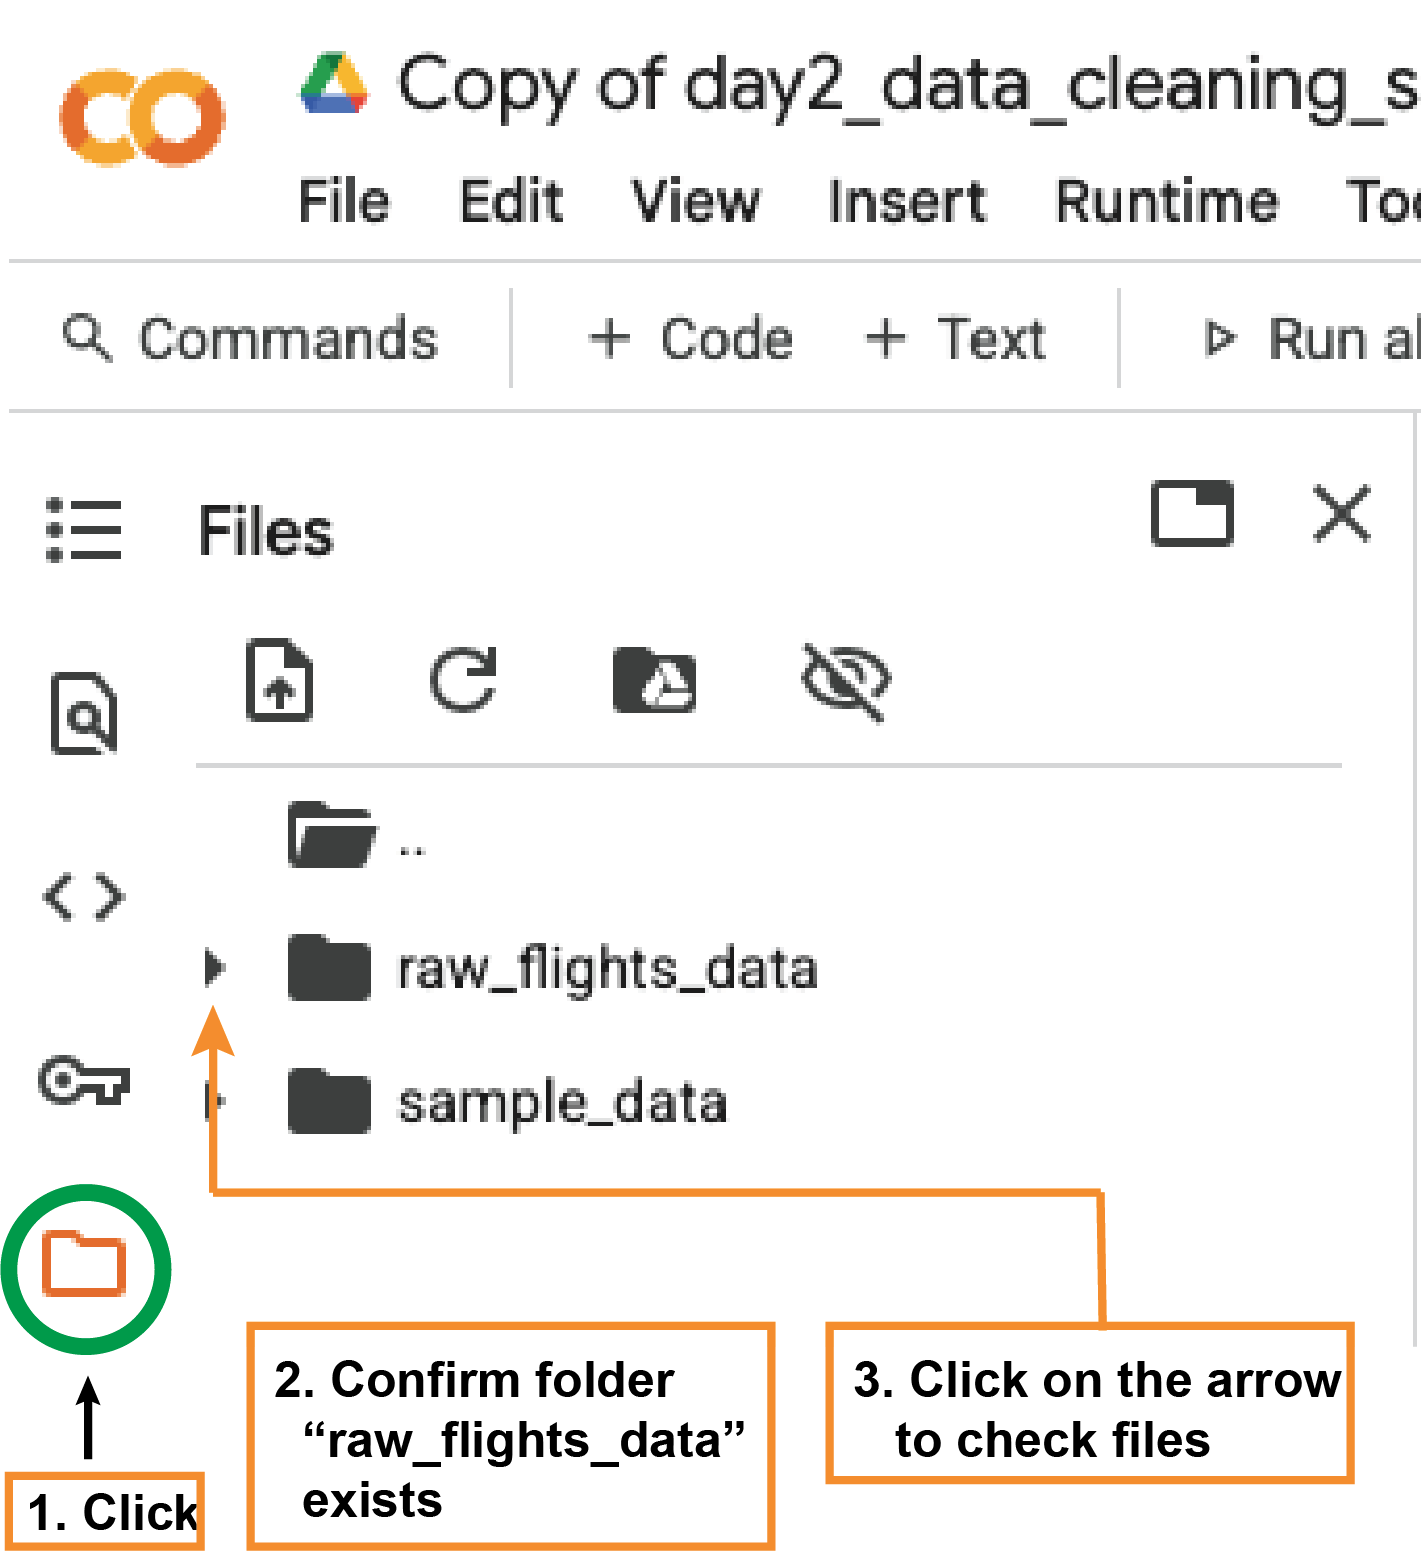

If everything's ready, let's gain access to the contents of this folder *through* python!

In [ ]:
os.listdir("raw_flights_data")

First of all, we see that the data is saved as **.csv** files. csv is short for 'comma separated values'. The pictures below show how they look like as is, and through excel, respectively.
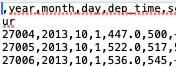

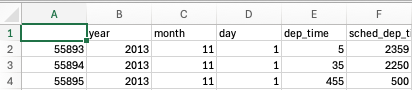

If you have a large dataset, having them as a .csv file allows python to treat them faster.

Moving on, we see how the data is scattered in this folder. We want to gather it into one. To do this, we will read a csv file into a pandas dataframe, which we have practiced yesterday. Depending on the format of the file, you need to specify more stuff in the read_csv function.
Let's take a couple minutes to read through https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
As a pointer, index_col, usecols, skiprows are some commonly used ones.

In [ ]:
all_dfs = []
for filename in os.listdir("raw_flights_data") : # Looping through all the files in the directory
    if filename.endswith(".csv") : # Only gathering files that ends with .csv, the format we are interested in
        flights_data_part = pd.read_csv(os.path.join("raw_flights_data", filename), index_col=0) # Note how you also need to specify precisely where the file is at!
        all_dfs.append(flights_data_part)

Now let's combine the dataframes separated by month into one! The concat() method provides a convenient way of doing so for a list of dataframes

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [ ]:
# Q) Can you figure out how to combine the DataFrames by looking at the document link above?
#    Specifically we want to...
#    1) concatenate the dfs in the all_dfs list
#    2) use the index values along the concatenation axis.
#    3) combine the DataFrames by their ROWS (i.e., vertically)
#    4) not sort along the non-concatenation axis.
flights_combined_df = <YOUR CODE HERE>

# After filling in the code run the next cell as well.

In [ ]:
# Need to pass this test to make sure everything was done correctly!
assert flights_combined_df.shape[0] == 336776
assert flights_combined_df.shape[1] == 19

### A very short exploratory data analysis exercise

In [ ]:
# Q) How do look at the first five rows of the dataframe?
<YOUR CODE HERE>

In [ ]:
# Q) Can you look at the first 12 rows of the dataframe?
<YOUR CODE HERE>

In [ ]:
# Because of the alphabetical order of the names of the months, the order of the dataframe doesn't look so nice.
# But before that, are we only dealing with year 2013?

# Q) How do we check all unique years in the dataset?
<YOUR CODE HERE>

In [ ]:
# Q) Can you write a for loop that goes through each origin airport, prints it along with the recorded number of flights from it?
<YOUR CODE HERE>

In [ ]:
# Q) Can you look up a function that counts the occurrence of each value in a column?
#    Then write the code that counts the occurrence of each value in the 'dest' column.
<YOUR CODE HERE>

# Do you see how this relates to the problem above?

In [ ]:
# Q) What was the code that gives you a comprehensive information (column name, non-null count and dtype) about the dataframe?
<YOUR CODE HERE>

In [ ]:
# Now that we know this dataset only contains that from year 2013, let's go ahead and sort the data by month, followed by day.
# Q) Let's try sorting the rows so that the data is first sorted by month (from Jan to Dec) then within that sorted by day (from 1 to 31)?
#    A few more conditions:
#    1) We want the instances to be sorted in place rather than making a copy.
#    2) We can ignore the indices.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

flights_combined_df.sort_values(<YOUR CODE HERE>)

In [ ]:
# Let's just naively check the first and last 3 rows to see if the month and day have been sorted well.
flights_combined_df.head(3)

In [ ]:
flights_combined_df.tail(3)

## Dealing with missing values

Unlike the simple dataset that we dealt with yesterday, not only do we have a huge number of instances but also NaN's, which is short for "Not a Number", throughout the dataset. Let's explore some methods associated with missing values.

In [ ]:
# The isna method applies whether each element in the dataframe is a missing value or not.
flights_combined_df.isna()

But for such a huge dataset, the information that we see above is not that useful. This is because we don't know how the NaN's are distributed. Are they in one column? Or are they randomly occurring across all of the columns?

Other than the .info() method we used above, the number of missing values can be counted for each column using the code below. We can do this by 'adding' across the rows (as specified by 'axis=0'). In the context of sum, False corresponds to 0 and True corresponds to 1.

In [ ]:
flights_combined_df.isna().sum(axis=0)

In [ ]:
# While we do have access to the number of missing values under every column from above, suppose you're specifically interested in 'arr_delay'.

# Q) Could you write the code that counts the number of missing values in the column 'arr_delay'?
<YOUR CODE HERE>

Let's say our goal is to **determine the arrival delay given the flight time, day, month, weather conditions and airline**. Then we do not necessarily need the rows that have the arr_delay value missing. Let's remove them using the .dropna() method.

In [ ]:
flights_combined_df.dropna(subset=["arr_delay"], axis=0, inplace=True) # We can set inplace=True because we copied the original df.
flights_combined_df.shape

In [ ]:
# Q) Let's look at the number of rows in each column that contains a missing value.
<YOUR CODE HERE>

There are times when keeping rows with missing NaNs could be valuable - particularly when every datapoint is precious. This can be done by 'imputing', or simply, filling in the missing values according to some rule. For numerical values, using a representative value like mean or median across the column is an easy, sensible way. You can also apply your expert knowledge to fill them in. Pandas also provides other ways of filling in missing data by detecting patterns in the values within a column. Please refer to the link below to learn more.

https://pandas.pydata.org/pandas-docs/dev/user_guide/missing_data.html

## More data analysis: grouping and aggregating

Now that we have cleaned up missing data, let's continue to analyze the dataset a bit more. Understanding your data well can be very helpful for subsequent tasks! Rather than looking at all sorts of statistics values one-by-one and column-by-column, you can specify everything you want to look at by using the aggregate function after specifying the columns in the df.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

In [ ]:
flights_combined_df[['arr_delay', 'dep_delay']].aggregate(["mean", "median", "min", "max"])

As we did in the iris dataset yesterday, getting a sense of how different features and the target values (what we want to predict) correlate can be very useful. Looking a little bit deeper than the representative statistics of the whole dataset could be useful. For example, there might be a trend in the departure delay to the month.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [ ]:
# You can group the DataFrame by a categorical value BEFORE using an aggregation function.
flights_combined_df.groupby("month")[["dep_delay"]].mean()

In [ ]:
# Let's say you are also interested if there are differences between the origin airport.
# Q) Write the code that groups the data by 'month' followed by 'origin' and the average of their departure delay.
dep_delay_by_month_and_origin = <YOUR CODE HERE>
dep_delay_by_month_and_origin

In [ ]:
# The result of the above has both month and origin as a 'MultiIndex'.
# Let's transform it to a table by moving 'origin' as columns.
dep_delay_unstacked = dep_delay_by_month_and_origin.unstack("origin")
dep_delay_unstacked

In [ ]:
# You might also be interested in the number of co-appearances of values in a specific pair of columns as it can reveal valuable insights in the Sciences.
# Here, let's look at the origin-destination pairs.
# You can use the '.size()' method after .groupby() to do this.
flights_combined_df.groupby(["origin", "dest"]).size()

## Exercises


We have learned A LOT about exploring data and cleaning them up with pandas (and matplotlib).

Let's try out writing some code to review what we have learned.

In [ ]:
# Q) Find all flights that had an arrival delay of two hours or more AND departed in July
# Note the values of 'arr_delay' are in minutes.
<YOUR CODE HERE>

In [ ]:
# Q) Find all flights that flew to Houston ("IAH" or "HOU") AND operated by United
<YOUR CODE HERE>

In [ ]:
# Q) Can you sort the carriers by their departure delays on average?
<YOUR CODE HERE>

In [ ]:
# Q) Can you plot a bar plot of the average departure delays by the carriers (i.e., what you coded above)?
# Feel free to play around with the additional options we looked into yesterday to make the plot aesthetics look pleasant to you!
sub_df = <YOUR CODE HERE>
plt.bar(
    x=sub_df.index,
    height=sub_df.values
)

In [ ]:
# Q) Can you draw a scatter plot that has...
#   1) departure delay on the x-axis
#   2) arrival delay on the y-axis
#   3) the color of each spot differing by the origin airport?
# Please make sure that there is a legend that denotes the origin airport for each color along with all axis labels.
# What observation is made?

cmap = matplotlib.colormaps["viridis"]
fig, ax = plt.subplots()
for i, origin in enumerate(<YOUR CODE HERE>):
    print(origin)
    ax.scatter(
        x=<YOUR CODE HERE>,
        y=<YOUR CODE HERE>,
        color = cmap(i/len(flights_combined_df["origin"].unique())),
        label=origin,
        alpha=0.5
    )
ax.legend()

## Even more exercise: more data cleaning

Similar to what was mentioned in one of the cells above, let's say that we are trying to predict the departure delay given the information of a flight. Before getting into modeling, it is important to tidy up the data as much as possible. A good inspection of the dataset, as we did, will be helpful. Let's take a look step by step.

One thing to look out for is variance of the values in one column across different rows. If values in a column stays constant across all rows, it will not add any value for predicting target values that differ from row to row. Let's look at columns from this perspective, checking the number of unique values each column has. But first, let's create a copy of the original df so that we can always come back to where we started if we make a big mistake.

In [ ]:
from copy import deepcopy
# Before we make any differences to the original df, let's make a copy
cleaned_df = deepcopy(flights_combined_df)
# Let's drop column(s) that have only one unique value
cleaned_df.drop("year", axis=1, inplace=True)

Document for the .drop() method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
# Q) Is there a column that is not helpful in this sense?
print("Unique values in each column")
for column_name in flights_combined_df.columns :
    print(column_name, <YOUR CODE HERE>)

In [ ]:
# Q) Can you remove the column 'time_hour', 'hour', 'minute' (hour and minute are included in sched_dep_time) in a similar manner?
cleaned_df.<YOUR CODE HERE>

In [ ]:
# If you know both the departure time and scheduled departure time, you basically 'know' the departure delay – our target value.
# Q) So first, let's also remove the dep_time. In a similar sense, let's simultaneously remove arr_time
cleaned_df.<YOUR CODE HERE>

In [ ]:
# The flight and tail numbers are determined by the flight information (origin, destination, time of flight etc.).
# Such features that have overlapping / correlated information are better removed for both interpretation and model performance purposes.
# Q) Can you also drop the two columns - flight and tailnum ?
cleaned_df.<YOUR CODE HERE>

In [ ]:
# Q) Can you separate out the column with the target values (dep_delay) using the .pop() method?
# Reference page:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
y = <YOUR CODE HERE> # Remark: dep_delay is the departure delay in minutes

In [ ]:
assert list(cleaned_df.columns) == ['month', 'day', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier', 'origin', 'dest', 'air_time', 'distance']

# Introduction to seaborn

Just like how pandas was built above numpy to make it more user-friendly for mingling with data, seaborn was built upon matplotlib to allow building plots more easily from pandas.

In [ ]:
import seaborn as sns

For example, let's take a look at one of the bar plots that you drew in one of the exercises above. We drew a bar plot of the average departure delay by carrier. For matplotlib, we first computed those values separately and then passed it as the 'height' parameter to plt.bar(). But with seaborn...

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
sns.barplot(
    flights_combined_df,
    x="carrier",
    y="dep_delay",
    errorbar=None
)

Simple as that! It's quite intuitive. For many conventional plots, the first parameter would be the pandas dataframe, and you pass in the column names that you would like each axis to represent! It's also really simple to add in additional variables to inspect. Here, for example, we add another column name, 'origin', to distinguish between, using different colors.

In [ ]:
sns.barplot(
    flights_combined_df,
    x="carrier",
    y="dep_delay",
    errorbar=None,
    hue="origin" # Adding another factor to distinguish between.
)

Yesterday we had to manually assign different colors to distinguish between the different iris type. Here, seaborn took care of it! But if we want to use the color blind-friendly colormap with seaborn, you pass it through the 'palette' parameter.

In [ ]:
sns.barplot(
    flights_combined_df,
    x="carrier",
    y="dep_delay",
    errorbar=None,
    hue="origin",
    palette="viridis" # To gain control over colors
)

There are some types of plots that are easier to access through seaborn than matplotlib. One of them is the heatmap. Let's look at one of the dataframes that we transformed above - the average departure delay by origin airport and month. Note how the heatmap requires such transformations, unlike barplot where we could directly pass in the dataframe as is.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
sns.heatmap(dep_delay_unstacked)

A feature of pandas that is a convenience and an inconvenience at the same time is how it automatically uses the column names as axis labels. So you either need to make sure that the column names are defined as how you want it to show up on figures OR have to redefine everything using things like plt.xlabel(). Let's also fix the range of the color bar shown on the right.

In [ ]:
import numpy as np

fig, ax = plt.subplots()
sns.heatmap(
    dep_delay_unstacked,
    vmin=0,
    vmax=25
)
ax.set_xlabel("Origin")
ax.set_xticklabels(["EWR", "JFK", "LGA"])
ax.set_ylabel("Month")
ax.set_yticklabels(np.arange(1, 13), rotation=0) #rotation=0 to make the numbers without rotation

Lastly, let's make the values in each cell to show up and make the cells square.

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(
    dep_delay_unstacked,
    vmin=0,
    vmax=25,
    annot=True, # Mark each cell with their values
    square=True # Make the aspect ratio 1:1
)
ax.set_xlabel("Origin")
ax.set_xticklabels(["EWR", "JFK", "LGA"])
ax.set_ylabel("Month")
ax.set_yticklabels(np.arange(1, 13), rotation=0)

# Wrapping up

In summary, we gained experience on a variety of data cleaning methods:


1.   Manipulating .csv files in a folder and combining them into a single pandas dataframe
2.   Inspecting the data for missing entries and removing them
3.   Further data cleaning so that it aligns with our objective

We've also strengthed our data analysis toolbox with seaborn, which allows quick and aesthetic way of plotting data represented as a pandas dataframe.

We'll finish this notebook by saving the dataframes cleaned up to this point. Pandas allows to convert the dataframes into a csv file, which was the same format the original data was in, through the .to_csv() method.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
y.to_csv("y_dep_delay.csv")
cleaned_df.to_csv("cleaned_data.csv")

If you run the notebook on your computer the files would be saved on the folder that the notebook is in. However, this is on the cloud and we will lose the two files necessary for the next session. So let's go ahead and download them onto your computer. (y_dep_delay.csv ~ 3.8 MB; cleaned_data.csv ~ 15.6 MB)

# Additional pandas manipulation and seaborn plotting exercises if we have time

Above, we looked at how many origin, destination cooccurrences there are. Let's build upon this.

In [ ]:
origin_destination_coocurrences = flights_combined_df.groupby(["origin", "dest"]).size()

In [ ]:
# Q) Can you transform this organized dataframe such that the origin corresponds to rows (or index) and the destination corresponds to columns?
origin_dest_cooccur_transformed = <YOUR CODE HERE>
origin_dest_cooccur_transformed

In [ ]:
# Q) Can you filter out columns that have missing values?
#    In other words, we want to drop origin-dest combinations that did not occur in the dataset
origin_dest_cooccur_filtered = <YOUR CODE HERE>
origin_dest_cooccur_filtered

In [ ]:
# Q) Can you get the shape of the dataframe we obtained above?
origin_dest_cooccur_filtered.<YOUR CODE HERE>

In [ ]:
# This is still too much information. Let's keep 10 destinations that have the highest sum of cooccurrences across the three origins.
occurrences_sum = <YOUR CODE HERE>
occurrences_sum_sorted = <YOUR CODE HERE> # sort the occurrences sum from largest to smallest
highest_dest_indices = <YOUR CODE HERE> # Then obtain the top-10 index names
largest_origin_dest_coccur = <YOUR CODE HERE> # Slice the origin_dest_cooccur_filtered dataframe to get the sub-dataframe we want

In [ ]:
# Q) Can you draw a heatmap?
#    1) Make sure that the tick lables on the y-axis have no rotation.
#    2) Change the colorbar to range from 0 to 10000.
#    3) Make each cell square
#    4) Lastly, show the number of occurrences in each cell
#    Please feel free to add other aesthetic modifications to your taste!
<YOUR CODE HERE>